In [ ]:
#Cargamos los paquetes necesarios
import matplotlib # Para generar gráficos
import numpy as np # Para trabajar datos en forma de matriz
import pandas as pd # Visualización de datos
import seaborn as sns #Darle mayor estilo a los gráficos 
import matplotlib.pyplot as plt #Interfaz para matplotlib
from sklearn.manifold import TSNE # sklearn es una paquetería de machine learning, importamos el modulo que nos permite obtener tsnes (Representacion de variables mas importantes de un modelo)
!pip install modlamp
from modlamp.descriptors import GlobalDescriptor, PeptideDescriptor # Cargamos modulos de ModlAMP para el calculo de descriptores moleculares (Propiedades fisicoquimicas)
from matplotlib import cm as cm # Para modificar los colores de los graficos realizados
import re #Modulo que nos permite  utilizar expresiones regulares en Python

In [2]:
#Leemos la base de datos y lo convertimos en un dataframe de Pandas. index_col delimita la columna que contiene los indices
amps=pd.read_csv("GRAMPA_ecoli.csv", index_col=0) 

In [3]:
sec_raw=pd.Series.tolist(amps["sequence"]) #Obtenemos la columna del dataframe de Pandas (Tambien llamado Panda Series) que contiene las secuencias de la base da datos y la convertimos a una lista para poder trabajar con ella
sec=[] #Iniciamos una lista vacia donde guardaremos las secuencias unicas presentes en la base de datos 
[sec.append(x) for x in sec_raw if x not in sec] #Este metodo se conoce como List comprehension, nos permite crear listas a partir de funciones sencillas. En este caso nuestra funcion itera dentro de la lista con todas las secuencias del data frame (sec_raw) y las añade a la nueva lista con la condicion de que no se hayan añadido previamente 
len(sec) #Imprimimos la longitud de la lista sec, es decir, cuantas secuencias se encuentran dentro de esta lista

4687

In [4]:
#Este procedimiento es similar al anterior pero para los indices, lo obtuve para saber cuantos valores de MIC en total tenemos
ind=[]
[ind.append(str(amps.index[i])) for i in range(len(amps))]
len(ind)

8190

In [ ]:
secs=pd.DataFrame(sec,columns=["sequence"]) #creamos una dataframe nuevo que contenga una unica columna con las secuencias separadas anteriormente, el parametro columns se usa para especificar el nombre que será colocado en la columna
secs.to_csv("/content/GRAMPA_filt_sec.csv") #Exportamos el dataframe a un archivo csv, la función toma como argumento la carpeta y el nombre que se quiere asignar al nuevo documento
secs

In [6]:
#Exportamos secuencias en fasta, para esto utilizamos las expresiones regulares

link2 = "/content/GRAMPA_sec_no_filt.fasta" #Establecemos la carpeta y el nombre que tendrá nuestro archivo nuevo
ofile = open(link2, "w") #con la función open abrimos el archivo y con el parámetro "w", indicamos que escribirem sobre este
for i in range(len(sec)): #Con este loop iteraremos sobre cada una de las secuencias de la lista sec
    
    ofile.write(">GRAMPA_" + str(i+1) + "\n" + sec[i] + "\n") #Escribimos sobre el archivo el encabezado genérico + el numero que lo identifica. Con "\n" establecemos un salto de linea para poder escribir la secuencia que corresponad en la posición i
    
ofile.close() #Cerramos el archivo, dejamos de escribir sobre el

In [7]:
#Ejemplo de calculo de un descriptor global de modlamp (Indice levitt para propension a formar helices)
helix=PeptideDescriptor(sec,"levitt_alpha")
helix.calculate_global()
desc_helix=helix.descriptor
secs["Helix_Levitt"]=desc_helix


In [ ]:
#Graficamos el descriptor recien calculado 
sns.set_theme(style="whitegrid") #Elegimos el estilo de la gráfica
sns.boxplot(x=secs["Helix_Levitt"]).set_title("Frecuencia normalizada a formar Alfa-hélice") # Establecemos el tipo de gráfico (Boxplot), especificando la x(es decir, los datos) y el titulo del grafico


In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (carga)
desc=GlobalDescriptor(sec)
desc.calculate_charge()
charge=desc.descriptor
charge
secs["Charge"]=charge
sns.boxplot(x=secs["Charge"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (aromaticity)
desc=GlobalDescriptor(sec)
desc.aromaticity()
aroma=desc.descriptor
aroma
secs["Aromaticity"]=aroma
sns.boxplot(x=secs["Aromaticity"])


In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (largo)
desc=GlobalDescriptor(sec)
desc.length()
length=desc.descriptor
length
secs["Sequence_length"]=length
sns.boxplot(x=secs["Sequence_length"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (MW)
desc=GlobalDescriptor(sec)
desc.calculate_MW()
MW=desc.descriptor
len(MW)
secs["Molecular_weight"]=MW
sns.boxplot(x=secs["Molecular_weight"])


In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (aliphatic)
desc=GlobalDescriptor(sec)
desc.aliphatic_index()
ali=desc.descriptor
ali
secs["Aliphatic_index"]=ali
sns.boxplot(x=secs["Aliphatic_index"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (hidrophobicity)
desc=GlobalDescriptor(sec)
desc.hydrophobic_ratio()
hidro=desc.descriptor
hidro
secs["Hydrophobic_ratio"]=hidro
sns.boxplot(x=secs["Hydrophobic_ratio"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Amino Acid Selectivity Index)
aasi=PeptideDescriptor(sec,"AASI")
aasi.calculate_global()
desc_aasi=aasi.descriptor
secs["AASI"]=desc_aasi

sns.boxplot(x=secs["AASI"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (physicochemical feature scale)
abh=PeptideDescriptor(sec,"ABHPRK")
abh.calculate_global()
desc_abh=abh.descriptor
secs["ABHPRK"]=desc_helix

sns.boxplot(x=secs["ABHPRK"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Argos hidrophobicity)
argos=PeptideDescriptor(sec,"argos")
argos.calculate_global()
desc_argos=argos.descriptor
secs["Argos_hidrophobicity"]=desc_argos

sns.boxplot(x=secs["Argos_hidrophobicity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Amino acid side chain bulkiness)
bulk=PeptideDescriptor(sec,"bulkiness")
bulk.calculate_global()
desc_bulk=bulk.descriptor
secs["Bulkiness"]=desc_bulk

sns.boxplot(x=secs["Bulkiness"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Charge pH 7)
char7=PeptideDescriptor(sec,"charge_phys")
char7.calculate_global()
desc_char7=char7.descriptor
secs["Charge_pH7"]=desc_char7

sns.boxplot(x=secs["Charge_pH7"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Charge acid)
chara=PeptideDescriptor(sec,"charge_acid")
chara.calculate_global()
desc_chara=chara.descriptor
secs["Charge_acid"]=desc_chara

sns.boxplot(x=secs["Charge_acid"])



In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Eisenberg_hydrophobicity)
eisen=PeptideDescriptor(sec,"eisenberg")
eisen.calculate_global()
desc_eisen=eisen.descriptor
secs["Eisenberg"]=desc_eisen

sns.boxplot(x=secs["Eisenberg"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (energies of insertion)
ez=PeptideDescriptor(sec,"Ez")
ez.calculate_global()
desc_ez=ez.descriptor
secs["Ez"]=desc_ez

sns.boxplot(x=secs["Ez"])
 

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (flexibility)
flex=PeptideDescriptor(sec,"flexibility")
flex.calculate_global()
desc_flex=flex.descriptor
secs["Flexibility"]=desc_flex

sns.boxplot(x=secs["Flexibility"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (amino acid side chain composition, polarity and molecular volume)
gran=PeptideDescriptor(sec,"grantham")
gran.calculate_global()
desc_gran=gran.descriptor
secs["Grantham"]=desc_gran

sns.boxplot(x=secs["Grantham"])


In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (GRAVY hydrophobicity)
gravy=PeptideDescriptor(sec,"gravy")
gravy.calculate_global()
desc_gravy=gravy.descriptor
secs["Gravy"]=desc_gravy

sns.boxplot(x=secs["Gravy"])


In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (hopp-woods hydrophobicity)
hw=PeptideDescriptor(sec,"hopp-woods")
hw.calculate_global()
desc_hw=hw.descriptor
secs["Hopp_Woods"]=desc_hw

sns.boxplot(x=secs["Hopp_Woods"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Isotropic Surface Area and Electronic Charge Index)
isaeci=PeptideDescriptor(sec,"ISAECI")
isaeci.calculate_global()
desc_isaeci=isaeci.descriptor
secs["ISAECI"]=desc_isaeci

sns.boxplot(x=secs["ISAECI"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Janin Hydrophobicity)
jan=PeptideDescriptor(sec,"janin")
jan.calculate_global()
desc_jan=jan.descriptor
secs["Janin_Hydrophobicity"]=desc_jan

sns.boxplot(x=secs["Janin_Hydrophobicity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (kytedoolittle Hydrophobicity)
kd=PeptideDescriptor(sec,"kytedoolittle")
kd.calculate_global()
desc_kd=kd.descriptor
secs["Kytedoolittle_Hydrophobicity"]=desc_kd

sns.boxplot(x=secs["Kytedoolittle_Hydrophobicity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (topological shape and size MSS)
mss=PeptideDescriptor(sec,"MSS")
mss.calculate_global()
desc_mss=mss.descriptor
secs["MSS"]=desc_mss

sns.boxplot(x=secs["MSS"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (PCA of the molecular surface)
msw=PeptideDescriptor(sec,"MSW")
msw.calculate_global()
desc_msw=msw.descriptor
secs["MSW"]=desc_msw

sns.boxplot(x=secs["MSW"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (pharmacophoric feature scale)
pA=PeptideDescriptor(sec,"pepArc")
pA.calculate_global()
desc_pA=pA.descriptor
secs["pepArc"]=desc_pA

sns.boxplot(x=secs["pepArc"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (pharmacophoric feature based PEPCATS)
pc=PeptideDescriptor(sec,"pepcats")
pc.calculate_global()
desc_pc=pc.descriptor
secs["pepcats"]=desc_pc

sns.boxplot(x=secs["pepcats"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (polarity)
pol=PeptideDescriptor(sec,"polarity")
pol.calculate_global()
desc_pol=pol.descriptor
secs["Polarity"]=desc_pol

sns.boxplot(x=secs["Polarity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (PPCALI)
pcal=PeptideDescriptor(sec,"PPCALI")
pcal.calculate_global()
desc_pcal=pcal.descriptor
secs["PPCALI"]=desc_pcal

sns.boxplot(x=secs["PPCALI"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (refractivity)
ref=PeptideDescriptor(sec,"refractivity")
ref.calculate_global()
desc_ref=ref.descriptor
secs["Refractivity"]=desc_ref

sns.boxplot(x=secs["Refractivity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (t_scale)
tscale=PeptideDescriptor(sec,"t_scale")
tscale.calculate_global()
desc_tscale=tscale.descriptor
secs["t_scale"]=desc_tscale

sns.boxplot(x=secs["t_scale"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (Amino acid transmembrane propensity)
TM=PeptideDescriptor(sec,"TM_tend")
TM.calculate_global()
desc_TM=TM.descriptor
secs["Transmembrane_propensity"]=desc_TM

sns.boxplot(x=secs["Transmembrane_propensity"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (three dimensional Z-scale)
z3=PeptideDescriptor(sec,"z3")
z3.calculate_global()
desc_z3=z3.descriptor
secs["3D_z-scale"]=desc_z3

sns.boxplot(x=secs["3D_z-scale"])

In [ ]:
#Ejemplo de calculo de un descriptor global de modlamp (five dimensional Z-scale)
z5=PeptideDescriptor(sec,"z5")
z5.calculate_global()
desc_z5=z5.descriptor
secs["5D_z-scale"]=desc_z5

sns.boxplot(x=secs["5D_z-scale"])

In [ ]:
secs

In [ ]:
secs.corr()

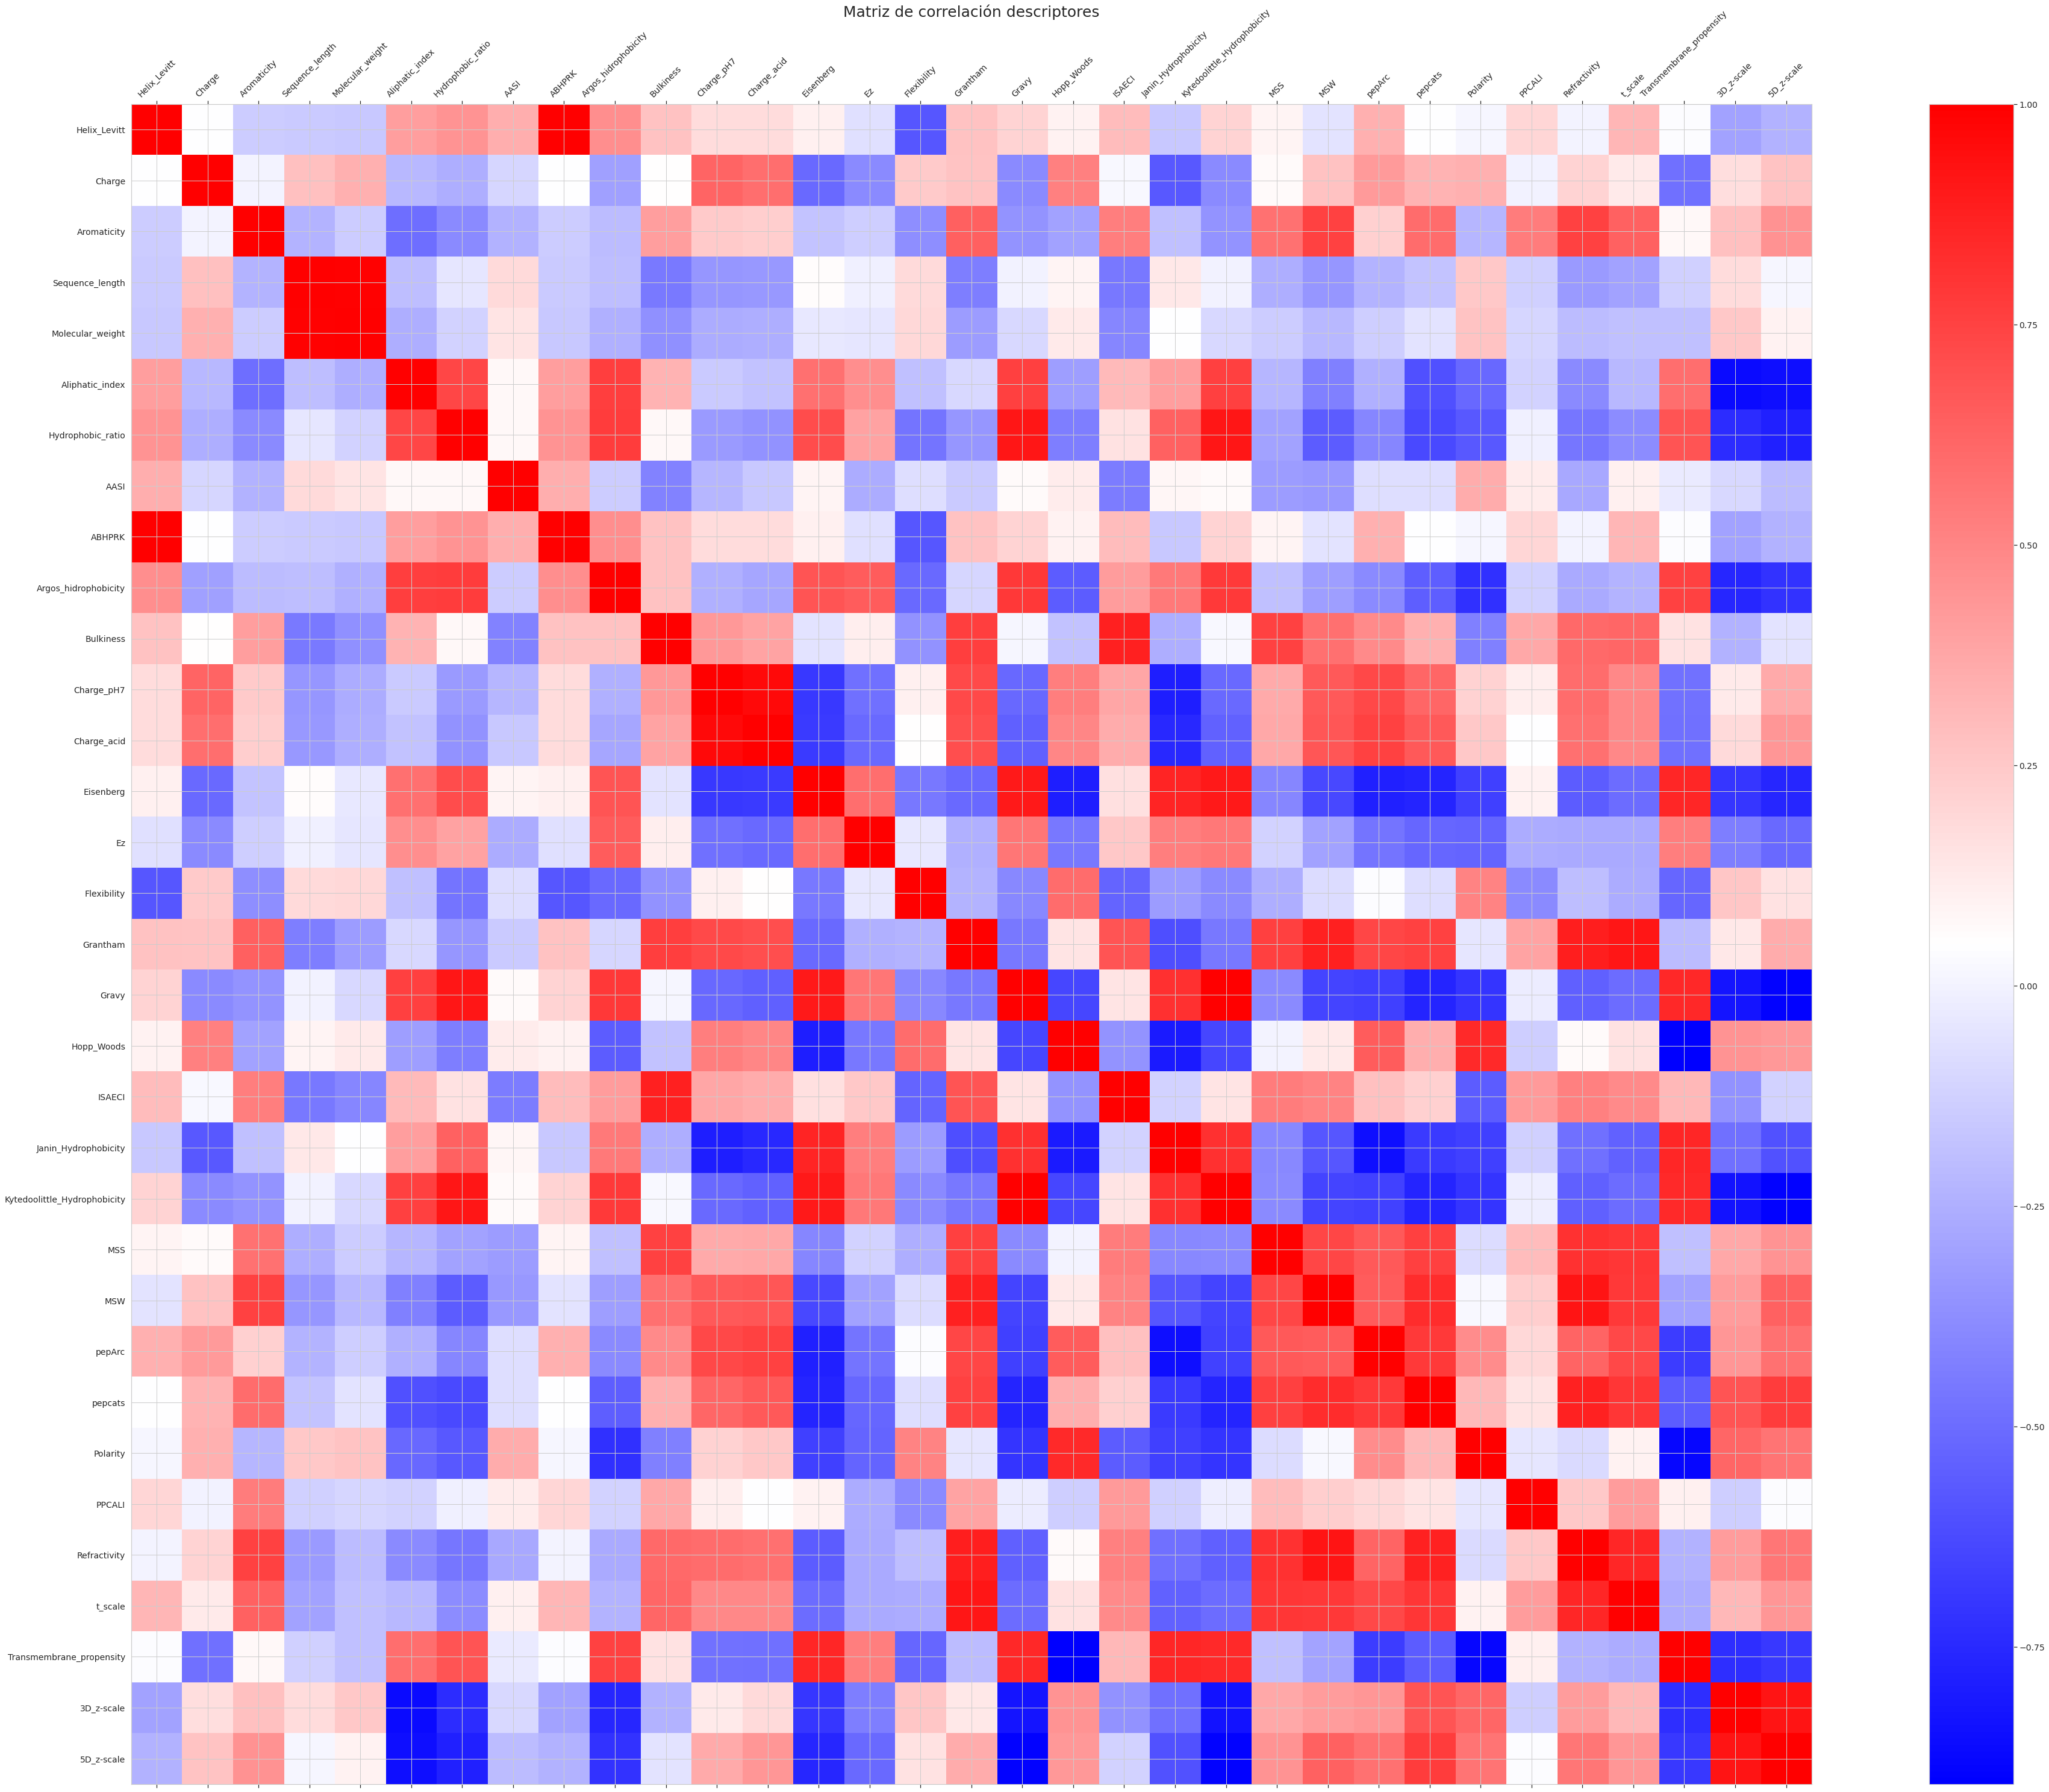

In [62]:
###Matriz de correlación
f = plt.figure(figsize=(70, 50))
plt.matshow(secs.corr(), fignum=f.number, cmap=cm.bwr)
plt.xticks(range(secs.select_dtypes(['number']).shape[1]), secs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(secs.select_dtypes(['number']).shape[1]), secs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=25);

In [ ]:
secs.corr().shape

In [45]:
from sklearn import preprocessing

In [46]:
secs_corr=secs.corr()

In [47]:
secs_prop=secs.drop(['sequence'], axis=1)

In [ ]:
###Normalizar los calculos de propiedades
from sklearn import preprocessing
d = preprocessing.normalize(secs_prop)
names = secs_prop.columns
scaled_df = pd.DataFrame(d, columns=names, )
scaled_df.head()

In [ ]:
corr_matrix=scaled_df.corr()
corr_matrix

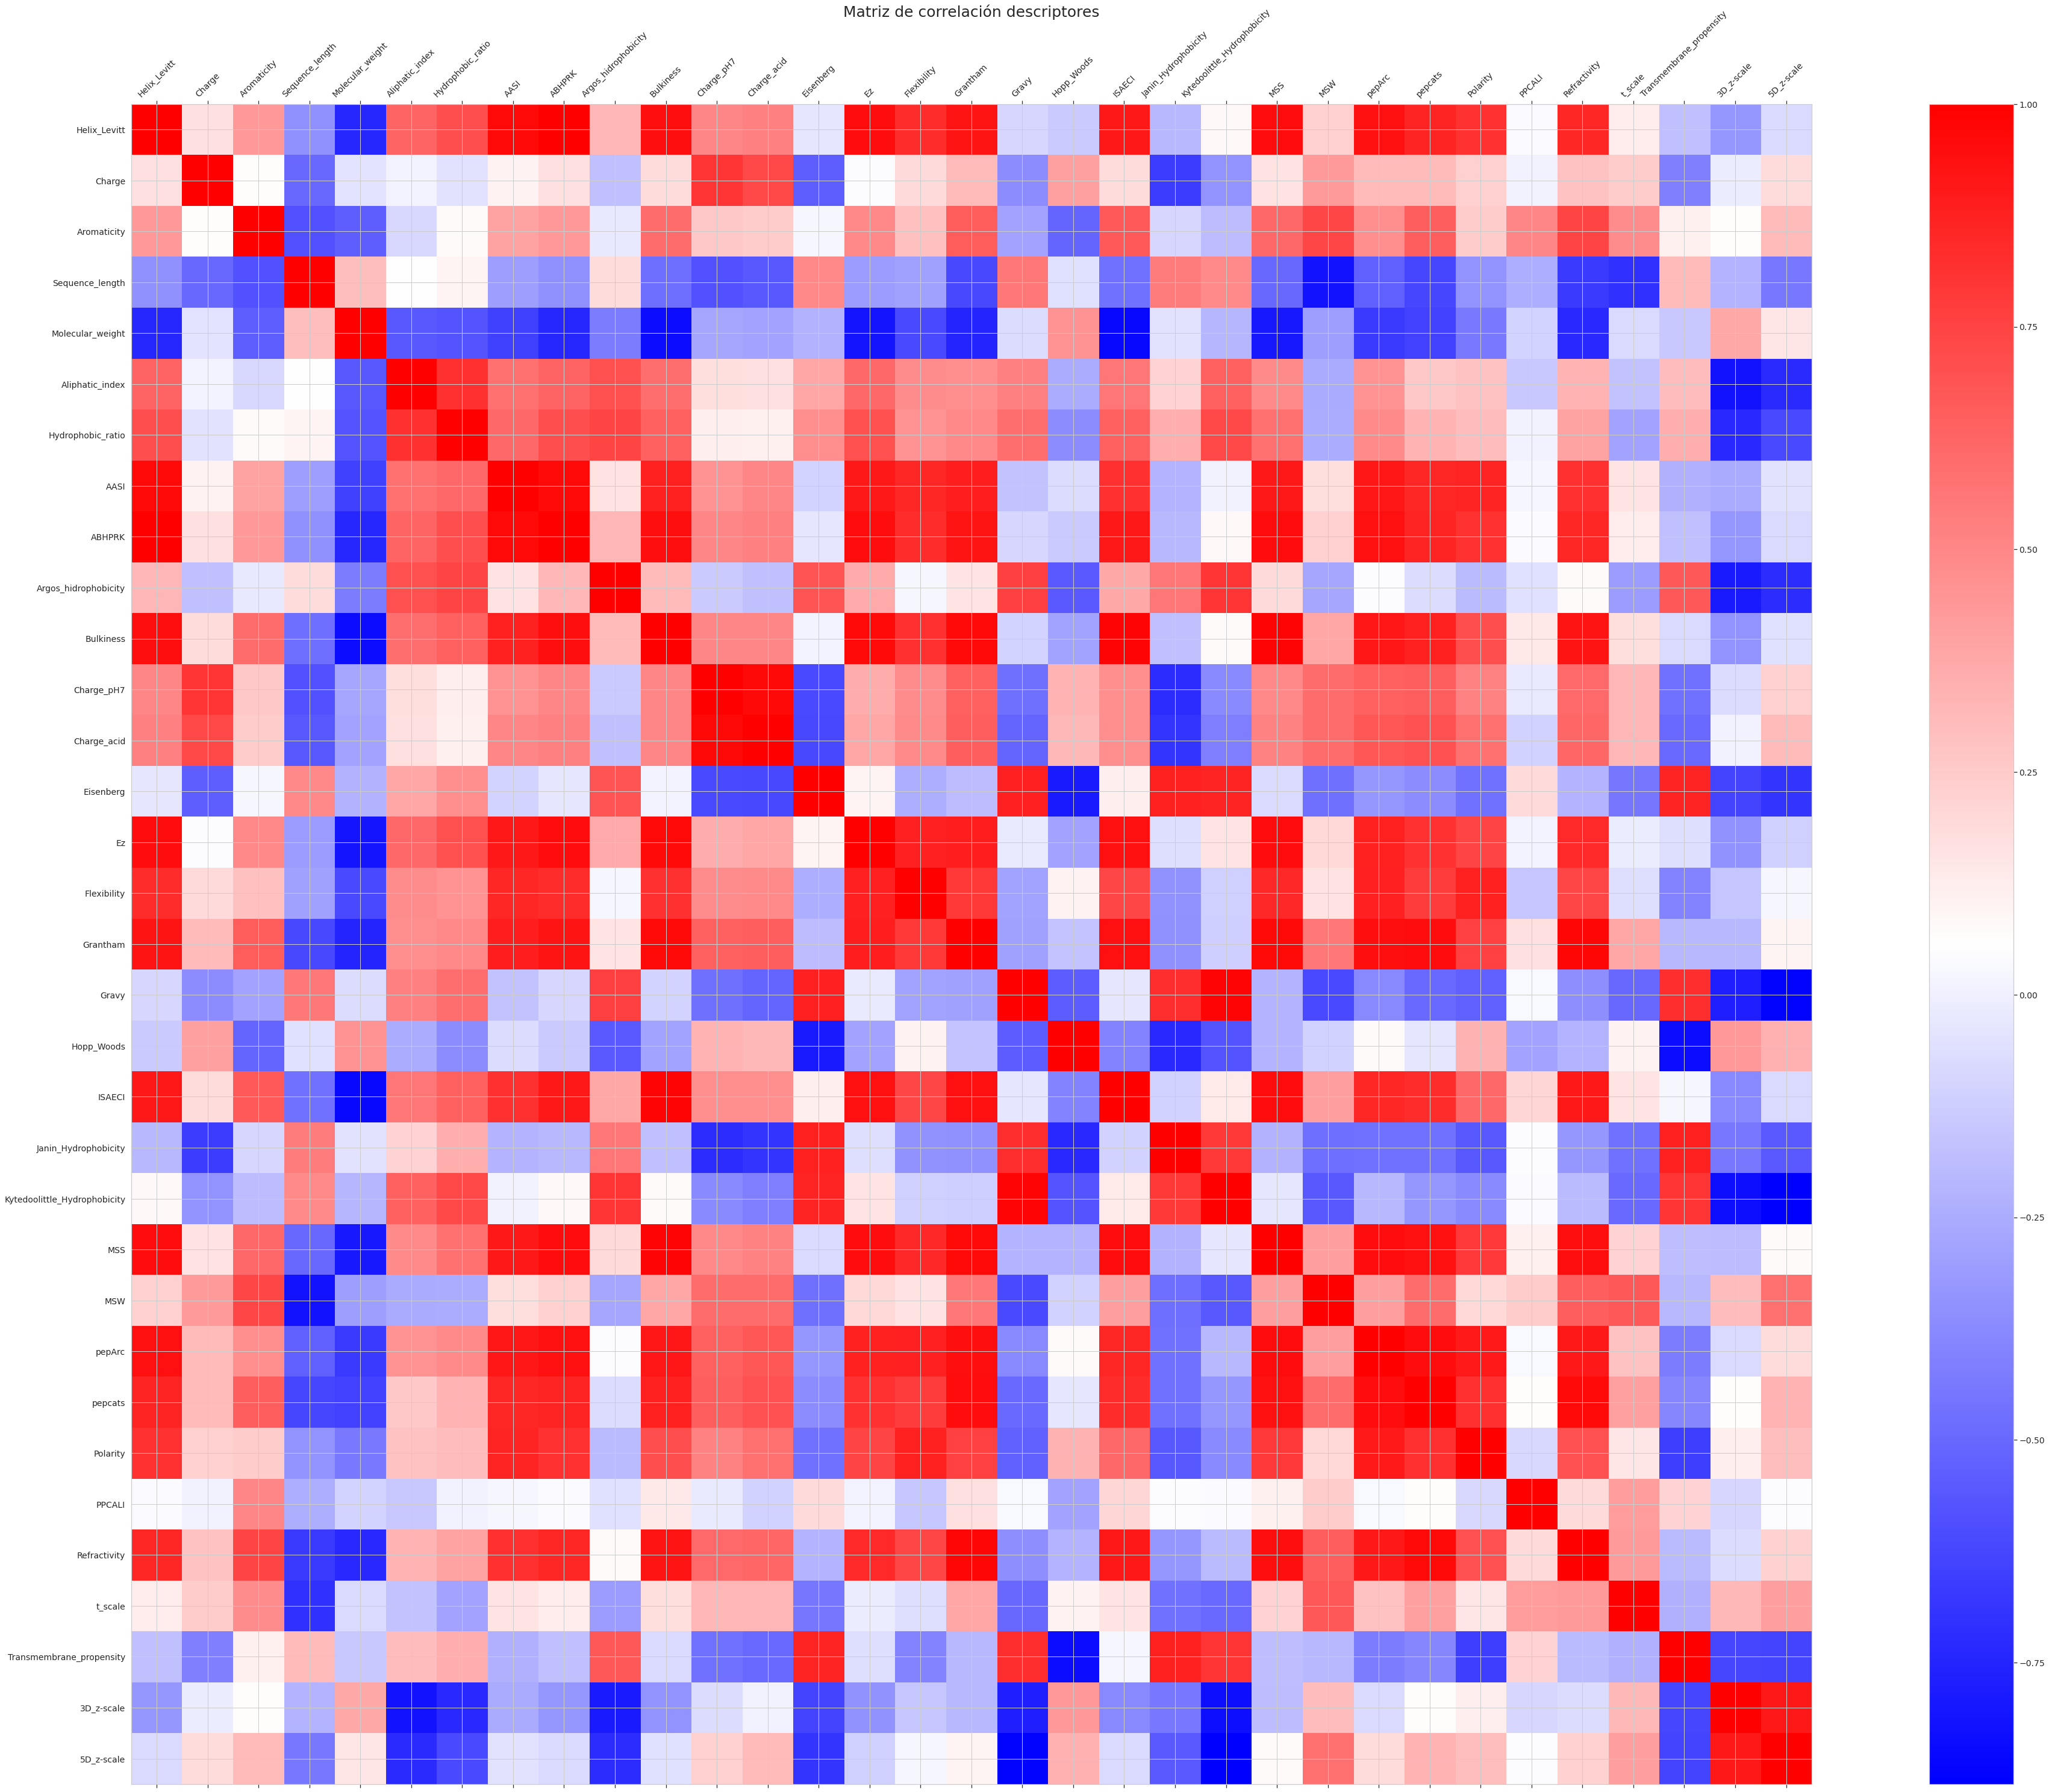

In [61]:
#Matriz de correlación normalizada
f = plt.figure(figsize=(70, 50))
plt.matshow(scaled_df.corr(), fignum=f.number, cmap=cm.bwr)
plt.xticks(range(secs.select_dtypes(['number']).shape[1]), secs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(secs.select_dtypes(['number']).shape[1]), secs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=25);

In [ ]:
##Filtrar y eliminar porpiedades con alta correlación (redundantes)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)

In [53]:
df1 = scaled_df.drop(['AASI', 'ABHPRK', 'Charge_acid', 'Ez', 'Grantham', 'ISAECI', 'Kytedoolittle_Hydrophobicity', 'MSS', 'Refractivity'], axis=1)

In [ ]:
df1.corr()

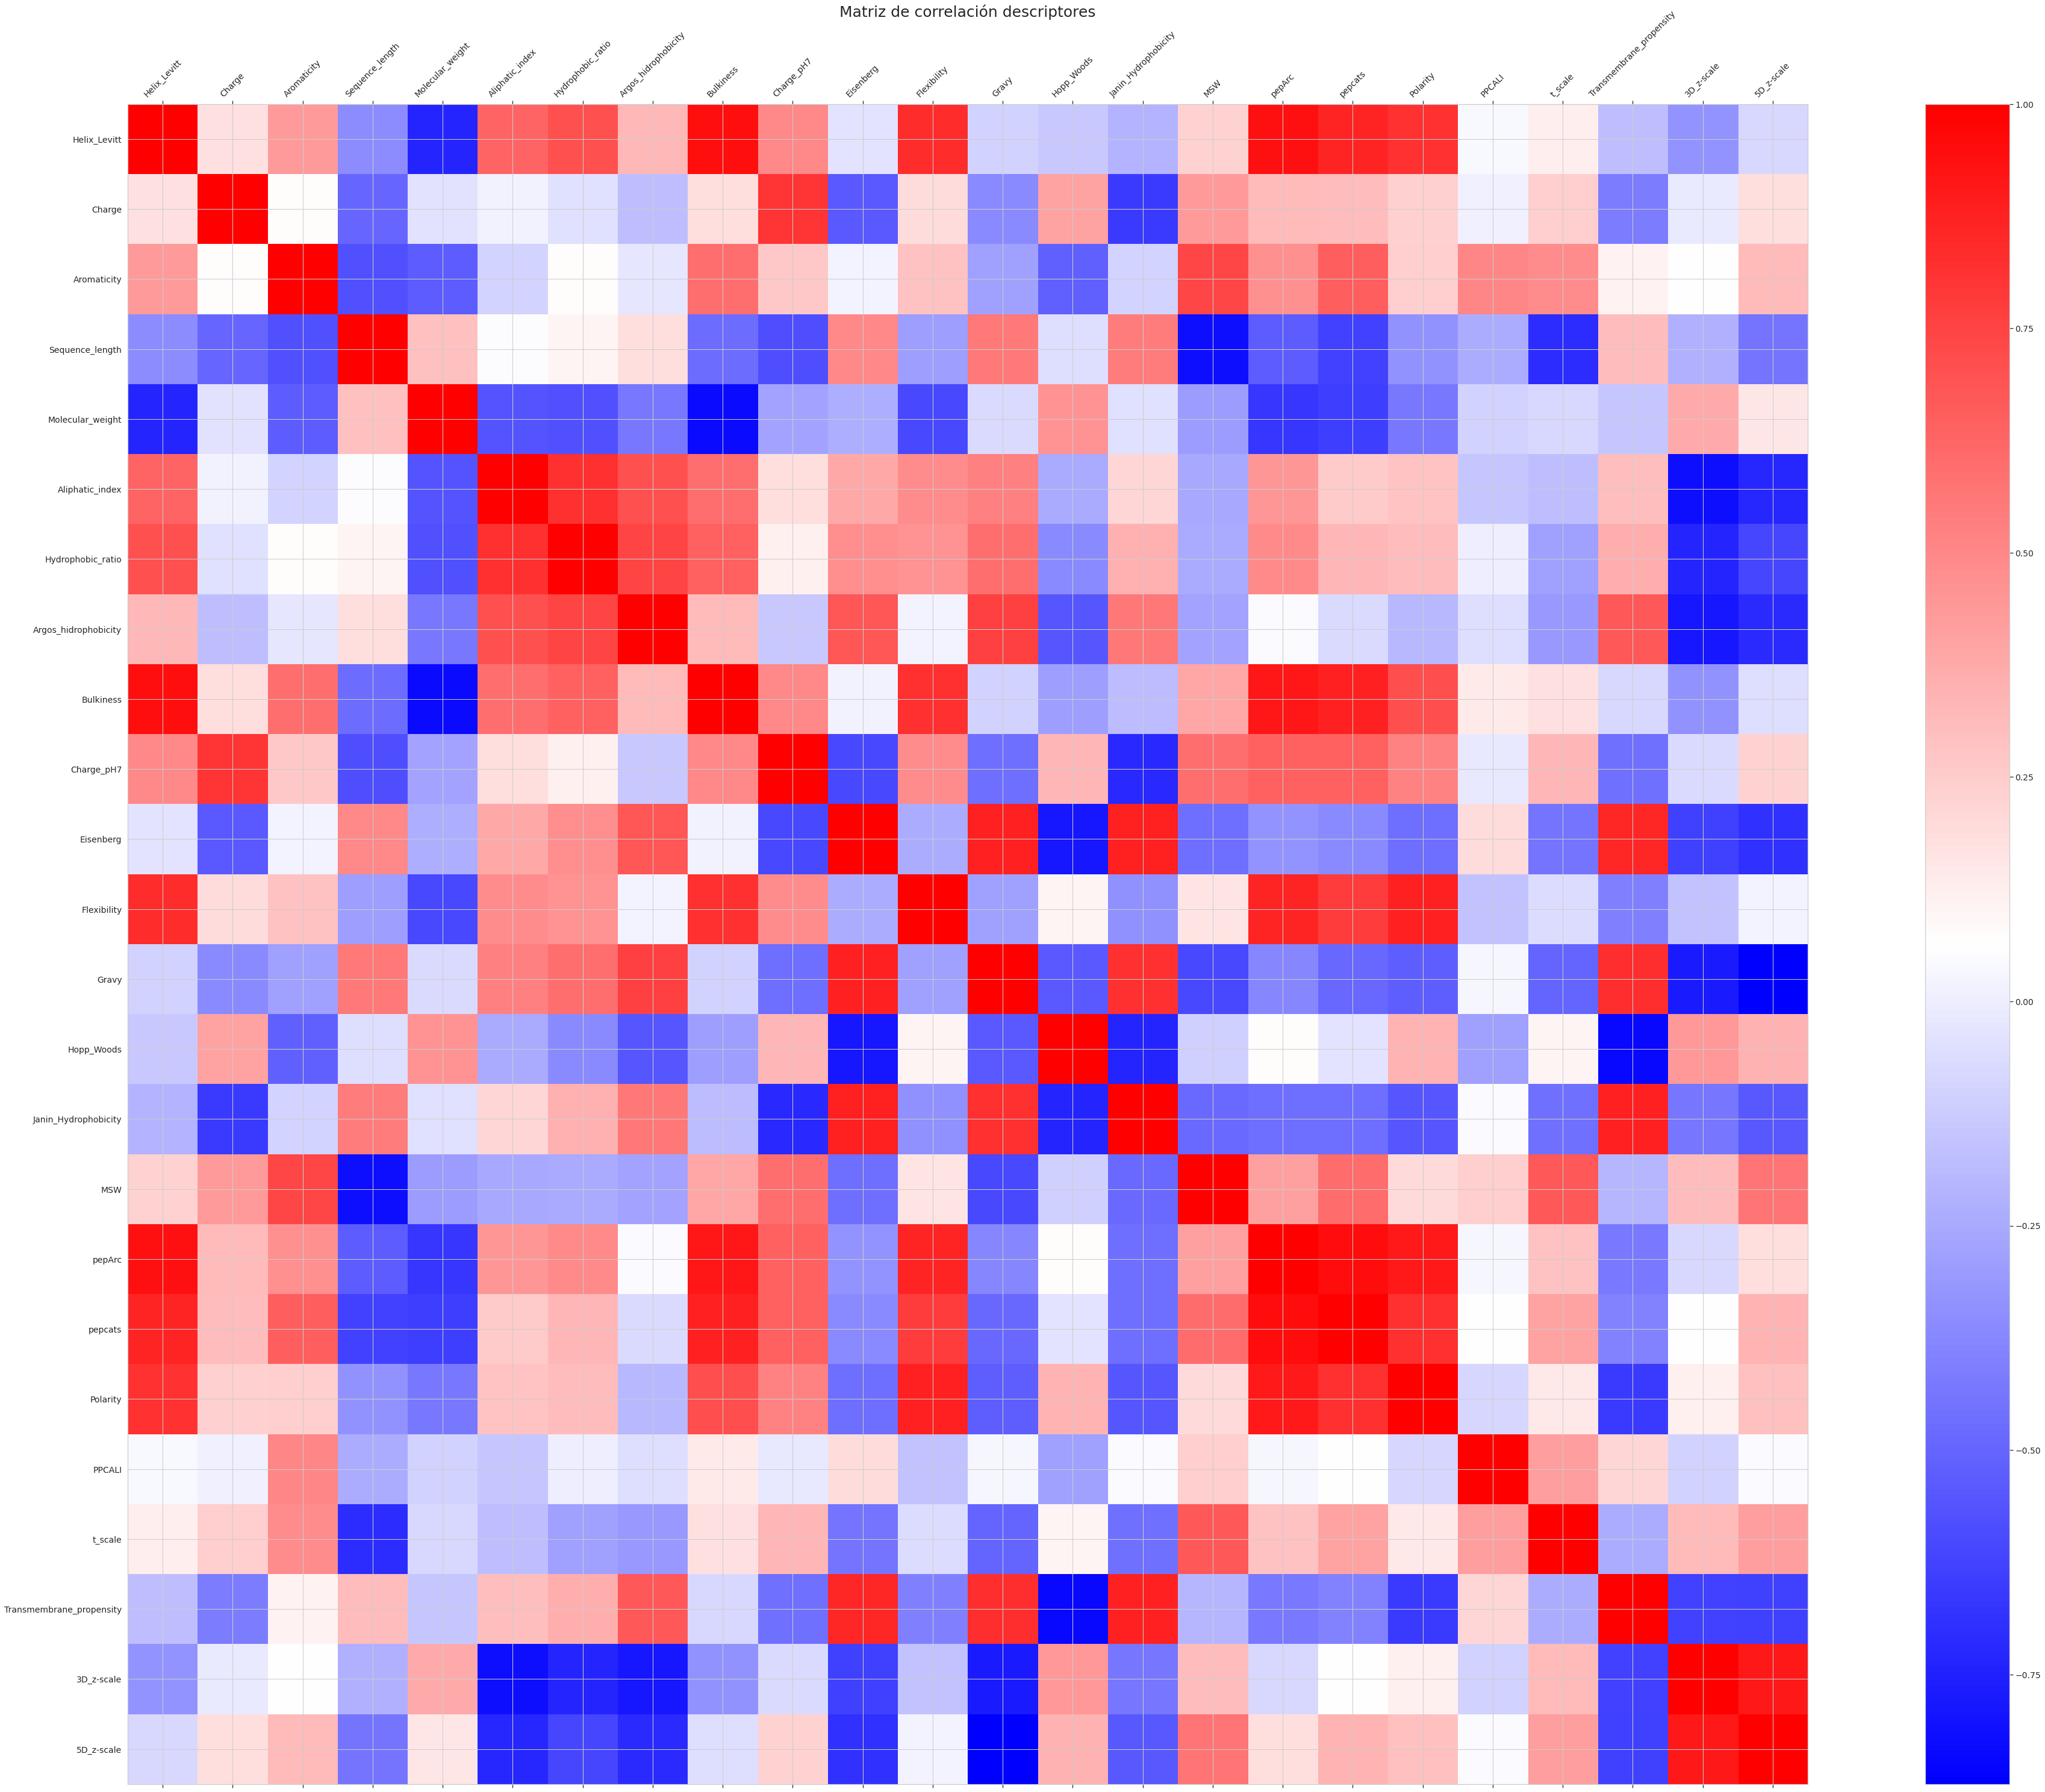

In [60]:
####Matriz de correlación filtrada

f = plt.figure(figsize=(70, 50))
plt.matshow(df1.corr(), fignum=f.number, cmap=cm.bwr)

plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=25);